In [1]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels

# Processing Data from PostGRES Output

In [2]:
fileprefix = "final_2" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [3]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [19]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 611f4665b4d9519095682405
2 5ec66c4259d924047b9c413a
3 6088a7e22d5b98ef3f813a22
4 60d08b617ca1ca6d48f9d710
5 5f009c12dac7c81b0e9c0d06
6 5c573e54e9813700018acc31
7 5e1fa7a528b7b62ca600adc7
8 5ec51242bc5aac433c0450ec
9 5ae0b456dc323f0001635e0b
10 601ffb441dc6d959b855eea5
11 5f268fa8c6f13f3d7f6b689a
12 5c85883136f2450001c86ba9
13 61504fea6e84e5a81f36b68c
14 5f761e5106b786071f45b4aa
15 6147c45e2fd30e98355c1e52
16 5f2046327f613f0e2c89c7dd
17 60e5d224c2070a7adc97befe
18 5b8c8e7d0c740e00019d55c3
19 5d7c0c2bf1cf8f001766626e
20 6064b073d8b83b30f7975c8d
21 610d37d392eceefd0088077b
22 5ae7cdd9a0e4390001f08f12
23 5f3a76043bb11c6786e731bf
24 debugRC6na
25 5efd2964d36f63162f263795
26 5fa863ce4a7c416f9f2671bd
27 6130ef46ab48b418221b4385
28 614b603d4da88384282967a7
29 5f9460e7df4eb2283ba0066a
30 5f3e36440f2e8d0008474ef9
31 615230e2db85b00b50240ab8
32 5f4aa79e4e8b0853b12512eb
33 5beef9e0c9f863000124cadf
34 59da7e94416c900001ea5b52
35 613a802b5c0b64bb69295ff3
36 6065ba36add2074fed28d812
37 5b16bc764412

In [20]:
part_data.keys()


dict_keys(['611f4665b4d9519095682405', '5ec66c4259d924047b9c413a', '6088a7e22d5b98ef3f813a22', '60d08b617ca1ca6d48f9d710', '5f009c12dac7c81b0e9c0d06', '5c573e54e9813700018acc31', '5e1fa7a528b7b62ca600adc7', '5ec51242bc5aac433c0450ec', '5ae0b456dc323f0001635e0b', '601ffb441dc6d959b855eea5', '5f268fa8c6f13f3d7f6b689a', '5c85883136f2450001c86ba9', '61504fea6e84e5a81f36b68c', '5f761e5106b786071f45b4aa', '6147c45e2fd30e98355c1e52', '5f2046327f613f0e2c89c7dd', '60e5d224c2070a7adc97befe', '5b8c8e7d0c740e00019d55c3', '5d7c0c2bf1cf8f001766626e', '6064b073d8b83b30f7975c8d', '610d37d392eceefd0088077b', '5ae7cdd9a0e4390001f08f12', '5f3a76043bb11c6786e731bf', '5efd2964d36f63162f263795', '5fa863ce4a7c416f9f2671bd', '6130ef46ab48b418221b4385', '614b603d4da88384282967a7', '5f9460e7df4eb2283ba0066a', '5f3e36440f2e8d0008474ef9', '615230e2db85b00b50240ab8', '5f4aa79e4e8b0853b12512eb', '5beef9e0c9f863000124cadf', '59da7e94416c900001ea5b52', '613a802b5c0b64bb69295ff3', '6065ba36add2074fed28d812', '5b16bc76

# Analyzing Trial Data

In [21]:
part = part_data['5eb40f1f0d916d20d9db9144']
part["Beginhit"]

KeyError: '5eb40f1f0d916d20d9db9144'

In [22]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    stroop_timestamps = {
        "1" : {
            "start" : 0,
            "end" : 0,
            "done" : False
        },
        "2" : {
            "start" : 0,
            "end" : 0,
            "done" : False
        }
    }
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    stroop1Completed = 0
    stroop1Correct = 0
    stroop2Completed = 0
    stroop2Correct = 0
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    comments = ""
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
        if trial_id == "stroop_1_ready_1" and not stroop_timestamps["1"]["done"]:
            stroop_timestamps["1"]["start"] = trial['dateTime']
            
        if trial_id == "stroop_2_ready_1" and not stroop_timestamps["2"]["done"]:
            stroop_timestamps["2"]["start"] = trial['dateTime']
            
        if trial_id == "finish_distractor_1" and not stroop_timestamps["1"]["done"]:
            stroop_timestamps["1"]["end"] = trial['dateTime']
            stroop_timestamps["1"]["done"] = True
            
        if trial_id == "finish_distractor_2" and not stroop_timestamps["2"]["done"]:
            stroop_timestamps["2"]["end"] = trial['dateTime']
            stroop_timestamps["2"]["done"] = True
            
        if trial_id == "mouselab_instructions_1" and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            
        if "congruent" in trial_id or "incongruent" in trial_id or "unrelated" in trial_id:
            if not stroop_timestamps["1"]["done"]:
                stroop1Completed += 1
                
                if trial['trialdata']["response"].lower() == trial['trialdata']["correct_response"].lower():
                    stroop1Correct += 1
                
            else:
                stroop2Completed += 1
                if trial['trialdata']["response"].lower() == trial['trialdata']["correct_response"].lower():
                    stroop2Correct += 1
                    
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                demographicsAvailable = True
        if trial_id.startswith("finish_fail"):
            demographicsAvailable = True
        if trial_type == 'survey-text':
            feedback = trial['trialdata']['response']['Q0']
            comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial

    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps, stroop_timestamps["1"], stroop_timestamps["2"]], ["mdp", "s1", "s2"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "condition": participant['condition'],
        "stroop1Length" : (stroop_timestamps["1"]["end"] - stroop_timestamps["1"]["start"]) / 1000,
        "stroop2Length" : (stroop_timestamps["2"]["end"] - stroop_timestamps["2"]["start"]) / 1000,
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "stroop1Completed" : stroop1Completed,
        "stroop2Completed" : stroop2Completed,
        "stroop1Correct" : stroop1Correct,
        "stroop2Correct" : stroop2Correct,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["stroop1Length"] + part_stats_dict["mouselabLength"] + part_stats_dict["stroop2Length"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

611f4665b4d9519095682405
5ec66c4259d924047b9c413a
6088a7e22d5b98ef3f813a22
60d08b617ca1ca6d48f9d710
5f009c12dac7c81b0e9c0d06
5c573e54e9813700018acc31
5e1fa7a528b7b62ca600adc7
5ec51242bc5aac433c0450ec
5ae0b456dc323f0001635e0b
601ffb441dc6d959b855eea5
No data
5f268fa8c6f13f3d7f6b689a
5c85883136f2450001c86ba9
61504fea6e84e5a81f36b68c
5f761e5106b786071f45b4aa
6147c45e2fd30e98355c1e52
5f2046327f613f0e2c89c7dd
60e5d224c2070a7adc97befe
60e5d224c2070a7adc97befe beginning
5b8c8e7d0c740e00019d55c3
5d7c0c2bf1cf8f001766626e
6064b073d8b83b30f7975c8d
6064b073d8b83b30f7975c8d mdp
610d37d392eceefd0088077b
5ae7cdd9a0e4390001f08f12
5f3a76043bb11c6786e731bf
5f3a76043bb11c6786e731bf s1
5efd2964d36f63162f263795
5fa863ce4a7c416f9f2671bd
6130ef46ab48b418221b4385
614b603d4da88384282967a7
614b603d4da88384282967a7 s2
5f9460e7df4eb2283ba0066a
5f3e36440f2e8d0008474ef9
615230e2db85b00b50240ab8
5f4aa79e4e8b0853b12512eb
5beef9e0c9f863000124cadf
5beef9e0c9f863000124cadf beginning
59da7e94416c900001ea5b52
613a802b5c0b

In [23]:
df_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "stroop1Length", "stroop1Completed", "stroop1Correct", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "bonus", "stroop2Length","stroop2Completed", "stroop2Correct", "dropoutPoint", "secretCodeReached", "psiturkStatus", "effort", "demographicsAvailable"]

stats_df = pd.DataFrame(part_stats_dicts, columns=df_cols)
print(len(stats_df))
stats_df

67


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.000,2445.000,1,0.000,0,0,1.0,120,...,538.0,NaN,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.000,2613.000,0,656.127,450,437,4.0,30,...,792.0,NaN,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.000,2712.000,0,810.220,450,445,1.0,30,...,1413.0,NaN,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.000,4656.000,0,924.009,450,446,2.0,30,...,1221.0,NaN,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.000,4253.000,0,1156.586,450,447,1.0,30,...,1115.0,NaN,1715.814,450,449,None,NaN,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,613c0bbec55231d8e1697bd7,2022-09-29 15:05:33.416614,5852.000,5796.000,1,0.000,0,0,4.0,120,...,32.0,NaN,0.000,0,0,None,NaN,3,1,True
63,610512f51cdd5835f2bd1a1c,2022-09-29 15:04:59.035761,1953.000,1947.000,1,0.000,0,0,1.0,120,...,1283.0,NaN,0.000,0,0,None,NaN,3,0,True
64,610ce0a48fc7e68abc4070c1,2022-09-29 15:08:35.422225,2046.431,2046.431,0,1154.469,450,429,2.0,1,...,19.0,NaN,0.000,0,0,mdp,NaN,6,-1,False
65,5f0021867c6da111da7c9b31,2022-09-29 15:09:54.405103,3412.000,3294.000,0,890.009,450,439,1.0,30,...,1071.0,NaN,729.373,450,446,None,NaN,3,0,True


In [24]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

64


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.000,2445.000,1,0.000,0,0,1.0,120,...,538.0,NaN,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.000,2613.000,0,656.127,450,437,4.0,30,...,792.0,NaN,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.000,2712.000,0,810.220,450,445,1.0,30,...,1413.0,NaN,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.000,4656.000,0,924.009,450,446,2.0,30,...,1221.0,NaN,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.000,4253.000,0,1156.586,450,447,1.0,30,...,1115.0,NaN,1715.814,450,449,None,NaN,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,613c0bbec55231d8e1697bd7,2022-09-29 15:05:33.416614,5852.000,5796.000,1,0.000,0,0,4.0,120,...,32.0,NaN,0.000,0,0,None,NaN,3,1,True
63,610512f51cdd5835f2bd1a1c,2022-09-29 15:04:59.035761,1953.000,1947.000,1,0.000,0,0,1.0,120,...,1283.0,NaN,0.000,0,0,None,NaN,3,0,True
64,610ce0a48fc7e68abc4070c1,2022-09-29 15:08:35.422225,2046.431,2046.431,0,1154.469,450,429,2.0,1,...,19.0,NaN,0.000,0,0,mdp,NaN,6,-1,False
65,5f0021867c6da111da7c9b31,2022-09-29 15:09:54.405103,3412.000,3294.000,0,890.009,450,439,1.0,30,...,1071.0,NaN,729.373,450,446,None,NaN,3,0,True


In [37]:
# Partial compensation rates

gbp_hourly = 6
secondly_rate = gbp_hourly / (3600)

In [38]:
# Early quitters

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['stroop1Length'] + early_quitters['mouselabLength'] + early_quitters['stroop2Length']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
    
early_quitters

2
5f3a76043bb11c6786e731bf, 0.01
60e94a95eed542e75d045ca6, 1.90


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_16080/3352235708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['stroop1Length'] + early_quitters['mouselabLength'] + early_quitters['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
21,5f3a76043bb11c6786e731bf,2022-09-29 15:08:20.681143,31.922,31.922,0,7.860,6,4,0.0,0,...,0.0,0.013100,0.0,0,0,s1,NaN,6,-1,False
53,60e94a95eed542e75d045ca6,2022-09-29 15:05:03.234483,1412.962,1412.962,0,1140.473,450,449,0.0,0,...,0.0,1.900788,0.0,0,0,mdp,NaN,6,-1,False


In [39]:
failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['stroop1Length'] + failed_quiz['mouselabLength'] + failed_quiz['stroop2Length']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

4
6064b073d8b83b30f7975c8d, 1.39
608c90af2b9dc5f9f35bb583, 2.13
6155a6764b2556042551a827, 2.98
605483d3fc701f842cbc5bde, 1.35


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_16080/1576330586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['stroop1Length'] + failed_quiz['mouselabLength'] + failed_quiz['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
18,6064b073d8b83b30f7975c8d,2022-09-29 15:05:04.515864,959.00,948.00,1,0.000,0,0,4.0,0,...,0.0,1.389947,0.0,0,0,mdp,NaN,3,-1,True
49,608c90af2b9dc5f9f35bb583,2022-09-29 15:04:59.347106,1438.93,1438.93,0,858.381,450,449,2.0,0,...,0.0,2.125943,0.0,0,0,mdp,NaN,6,-1,False
57,6155a6764b2556042551a827,2022-09-29 15:05:23.312413,2075.00,2066.00,0,731.103,450,444,4.0,0,...,0.0,2.978617,0.0,0,0,mdp,NaN,3,-1,True
61,605483d3fc701f842cbc5bde,2022-09-29 15:07:01.371608,897.00,892.00,1,0.000,0,0,4.0,0,...,0.0,1.349568,0.0,0,0,mdp,NaN,3,-1,True


In [33]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

6064b073d8b83b30f7975c8d	1
608c90af2b9dc5f9f35bb583	0
6155a6764b2556042551a827	0
605483d3fc701f842cbc5bde	1


In [29]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

58


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.000,2445.000,1,0.000,0,0,1.0,120,...,538.00,NaN,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.000,2613.000,0,656.127,450,437,4.0,30,...,792.00,NaN,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.000,2712.000,0,810.220,450,445,1.0,30,...,1413.00,NaN,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.000,4656.000,0,924.009,450,446,2.0,30,...,1221.00,NaN,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.000,4253.000,0,1156.586,450,447,1.0,30,...,1115.00,NaN,1715.814,450,449,None,NaN,3,1,True
5,5c573e54e9813700018acc31,2022-09-29 17:01:24.216913,1781.000,1777.000,0,541.987,450,410,1.0,30,...,1302.00,NaN,521.527,450,416,None,NaN,3,0,True
6,5e1fa7a528b7b62ca600adc7,2022-09-29 14:59:00.159231,2275.000,2267.000,1,0.000,0,0,4.0,120,...,898.25,NaN,0.000,0,0,None,NaN,3,0,True
7,5ec51242bc5aac433c0450ec,2022-09-29 14:59:40.186057,2116.000,2111.000,1,0.000,0,0,1.0,120,...,879.50,NaN,0.000,0,0,None,NaN,3,0,True
8,5ae0b456dc323f0001635e0b,2022-09-29 14:59:49.049393,2249.000,2243.000,0,582.971,450,426,1.0,30,...,1237.00,NaN,783.727,450,429,None,NaN,3,0,True
9,5f268fa8c6f13f3d7f6b689a,2022-09-29 15:05:40.716750,2398.000,2390.000,1,0.000,0,0,1.0,120,...,1275.75,NaN,0.000,0,0,None,NaN,3,0,True


In [30]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3)]
print(len(incomplete_data))
incomplete_data

3


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
25,614b603d4da88384282967a7,2022-09-29 15:04:40.704945,6418.553,6418.553,0,590.623,450,435,3.0,30,...,1248.0,NaN,7.414,6,6,s2,NaN,6,-1,False
52,5db9e0044a8eb40431d5e782,2022-09-29 15:05:29.231887,1872.863,1872.863,0,646.371,450,446,1.0,30,...,1169.0,NaN,502.536,305,301,s2,NaN,2,-1,False
64,610ce0a48fc7e68abc4070c1,2022-09-29 15:08:35.422225,2046.431,2046.431,0,1154.469,450,429,2.0,1,...,19.0,NaN,0.000,0,0,mdp,NaN,6,-1,False


In [34]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

614b603d4da88384282967a7	0
5db9e0044a8eb40431d5e782	0
610ce0a48fc7e68abc4070c1	0


In [35]:
incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = ["610ce0a48fc7e68abc4070c1"]

In [36]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['stroop1Length'] + incomplete_partial['mouselabLength'] + incomplete_partial['stroop2Length']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
incomplete_partial

1
610ce0a48fc7e68abc4070c1, 3.11


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_16080/3363054834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['stroop1Length'] + incomplete_partial['mouselabLength'] + incomplete_partial['stroop2Length']) * secondly_rate


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
64,610ce0a48fc7e68abc4070c1,2022-09-29 15:08:35.422225,2046.431,2046.431,0,1154.469,450,429,2.0,1,...,19.0,3.106337,0.0,0,0,mdp,NaN,6,-1,False


In [40]:
complete_data = eligible.loc[(eligible.psiturkStatus == 3)]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
complete_data

27
28


,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.0,2445.0,1,0.000,0,0,1.0,120,...,538.00,NaN,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.0,2613.0,0,656.127,450,437,4.0,30,...,792.00,NaN,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.0,2712.0,0,810.220,450,445,1.0,30,...,1413.00,NaN,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.0,4656.0,0,924.009,450,446,2.0,30,...,1221.00,NaN,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.0,4253.0,0,1156.586,450,447,1.0,30,...,1115.00,NaN,1715.814,450,449,None,NaN,3,1,True
5,5c573e54e9813700018acc31,2022-09-29 17:01:24.216913,1781.0,1777.0,0,541.987,450,410,1.0,30,...,1302.00,NaN,521.527,450,416,None,NaN,3,0,True
6,5e1fa7a528b7b62ca600adc7,2022-09-29 14:59:00.159231,2275.0,2267.0,1,0.000,0,0,4.0,120,...,898.25,NaN,0.000,0,0,None,NaN,3,0,True
7,5ec51242bc5aac433c0450ec,2022-09-29 14:59:40.186057,2116.0,2111.0,1,0.000,0,0,1.0,120,...,879.50,NaN,0.000,0,0,None,NaN,3,0,True
8,5ae0b456dc323f0001635e0b,2022-09-29 14:59:49.049393,2249.0,2243.0,0,582.971,450,426,1.0,30,...,1237.00,NaN,783.727,450,429,None,NaN,3,0,True
9,5f268fa8c6f13f3d7f6b689a,2022-09-29 15:05:40.716750,2398.0,2390.0,1,0.000,0,0,1.0,120,...,1275.75,NaN,0.000,0,0,None,NaN,3,0,True


In [41]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

611f4665b4d9519095682405	1
5ec66c4259d924047b9c413a	0
6088a7e22d5b98ef3f813a22	0
60d08b617ca1ca6d48f9d710	0
5f009c12dac7c81b0e9c0d06	0
5c573e54e9813700018acc31	0
5e1fa7a528b7b62ca600adc7	1
5ec51242bc5aac433c0450ec	1
5ae0b456dc323f0001635e0b	0
5f268fa8c6f13f3d7f6b689a	1
5c85883136f2450001c86ba9	0
61504fea6e84e5a81f36b68c	0
5f761e5106b786071f45b4aa	0
6147c45e2fd30e98355c1e52	0
5f2046327f613f0e2c89c7dd	0
5b8c8e7d0c740e00019d55c3	0
5d7c0c2bf1cf8f001766626e	1
610d37d392eceefd0088077b	1
5ae7cdd9a0e4390001f08f12	0
5efd2964d36f63162f263795	0
5fa863ce4a7c416f9f2671bd	1
6130ef46ab48b418221b4385	0
5f9460e7df4eb2283ba0066a	0
5f3e36440f2e8d0008474ef9	1
615230e2db85b00b50240ab8	1
5f4aa79e4e8b0853b12512eb	1
59da7e94416c900001ea5b52	1
613a802b5c0b64bb69295ff3	1
6065ba36add2074fed28d812	1
5b16bc7644127b00013f7245	0
614083f44ae49152b80502a1	0
5ffa1a0f5395ad3a679fb0f0	0
613b5959d8c8b12a746fdc21	1
5d7d00bb64f400001bd72301	0
5fe739ad52b0e20aac79e43c	1
5f91fcfd4bc991107c2bbd47	1
60185c812e31c90cbd82f28c	0
5

In [42]:
full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

full_bonus_eligible

,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.0,2445.0,1,0.000,0,0,1.0,120,...,538.00,NaN,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.0,2613.0,0,656.127,450,437,4.0,30,...,792.00,NaN,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.0,2712.0,0,810.220,450,445,1.0,30,...,1413.00,NaN,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.0,4656.0,0,924.009,450,446,2.0,30,...,1221.00,NaN,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.0,4253.0,0,1156.586,450,447,1.0,30,...,1115.00,NaN,1715.814,450,449,None,NaN,3,1,True
5,5c573e54e9813700018acc31,2022-09-29 17:01:24.216913,1781.0,1777.0,0,541.987,450,410,1.0,30,...,1302.00,NaN,521.527,450,416,None,NaN,3,0,True
6,5e1fa7a528b7b62ca600adc7,2022-09-29 14:59:00.159231,2275.0,2267.0,1,0.000,0,0,4.0,120,...,898.25,NaN,0.000,0,0,None,NaN,3,0,True
7,5ec51242bc5aac433c0450ec,2022-09-29 14:59:40.186057,2116.0,2111.0,1,0.000,0,0,1.0,120,...,879.50,NaN,0.000,0,0,None,NaN,3,0,True
8,5ae0b456dc323f0001635e0b,2022-09-29 14:59:49.049393,2249.0,2243.0,0,582.971,450,426,1.0,30,...,1237.00,NaN,783.727,450,429,None,NaN,3,0,True
9,5f268fa8c6f13f3d7f6b689a,2022-09-29 15:05:40.716750,2398.0,2390.0,1,0.000,0,0,1.0,120,...,1275.75,NaN,0.000,0,0,None,NaN,3,0,True


In [43]:
# Calculating the bonus conversion rate for each condition

max_bonus = 2.0

bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,hitLength,expLength,condition,stroop1Length,stroop1Completed,stroop1Correct,numQuizAttempts,numTrialsCompleted,...,finalScore,bonus,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,secretCodeReached,psiturkStatus,effort,demographicsAvailable
0,611f4665b4d9519095682405,2022-09-29 15:07:58.018460,2475.0,2445.0,1,0.000,0,0,1.0,120,...,538.00,0.724945,0.000,0,0,None,NaN,3,0,True
1,5ec66c4259d924047b9c413a,2022-09-29 15:05:35.292339,2625.0,2613.0,0,656.127,450,437,4.0,30,...,792.00,1.110799,575.031,450,430,None,NaN,3,0,True
2,6088a7e22d5b98ef3f813a22,2022-09-29 15:05:08.608239,2723.0,2712.0,0,810.220,450,445,1.0,30,...,1413.00,1.981767,742.501,450,448,None,NaN,3,0,True
3,60d08b617ca1ca6d48f9d710,2022-09-29 15:05:57.659941,4664.0,4656.0,0,924.009,450,446,2.0,30,...,1221.00,1.712482,1185.080,450,442,None,NaN,3,0,True
4,5f009c12dac7c81b0e9c0d06,2022-09-29 15:04:54.375579,5196.0,4253.0,0,1156.586,450,447,1.0,30,...,1115.00,1.563815,1715.814,450,449,None,NaN,3,1,True
5,5c573e54e9813700018acc31,2022-09-29 17:01:24.216913,1781.0,1777.0,0,541.987,450,410,1.0,30,...,1302.00,1.826087,521.527,450,416,None,NaN,3,0,True
6,5e1fa7a528b7b62ca600adc7,2022-09-29 14:59:00.159231,2275.0,2267.0,1,0.000,0,0,4.0,120,...,898.25,1.210376,0.000,0,0,None,NaN,3,0,True
7,5ec51242bc5aac433c0450ec,2022-09-29 14:59:40.186057,2116.0,2111.0,1,0.000,0,0,1.0,120,...,879.50,1.185110,0.000,0,0,None,NaN,3,0,True
8,5ae0b456dc323f0001635e0b,2022-09-29 14:59:49.049393,2249.0,2243.0,0,582.971,450,426,1.0,30,...,1237.00,1.734923,783.727,450,429,None,NaN,3,0,True
9,5f268fa8c6f13f3d7f6b689a,2022-09-29 15:05:40.716750,2398.0,2390.0,1,0.000,0,0,1.0,120,...,1275.75,1.719050,0.000,0,0,None,NaN,3,0,True


In [44]:
# Printing bonuses

for idx, row in full_bonus_eligible.iterrows():
    if(row['bonus'] > 0):
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))

611f4665b4d9519095682405, 0.72
5ec66c4259d924047b9c413a, 1.11
6088a7e22d5b98ef3f813a22, 1.98
60d08b617ca1ca6d48f9d710, 1.71
5f009c12dac7c81b0e9c0d06, 1.56
5c573e54e9813700018acc31, 1.83
5e1fa7a528b7b62ca600adc7, 1.21
5ec51242bc5aac433c0450ec, 1.19
5ae0b456dc323f0001635e0b, 1.73
5f268fa8c6f13f3d7f6b689a, 1.72
5c85883136f2450001c86ba9, 1.25
61504fea6e84e5a81f36b68c, 1.06
5f761e5106b786071f45b4aa, 1.72
6147c45e2fd30e98355c1e52, 1.54
5f2046327f613f0e2c89c7dd, 0.27
5b8c8e7d0c740e00019d55c3, 1.93
5d7c0c2bf1cf8f001766626e, 1.62
610d37d392eceefd0088077b, 1.27
5ae7cdd9a0e4390001f08f12, 0.08
5efd2964d36f63162f263795, 1.59
5fa863ce4a7c416f9f2671bd, 1.63
6130ef46ab48b418221b4385, 0.54
5f9460e7df4eb2283ba0066a, 2.00
5f3e36440f2e8d0008474ef9, 1.79
615230e2db85b00b50240ab8, 1.75
5f4aa79e4e8b0853b12512eb, 1.53
59da7e94416c900001ea5b52, 1.03
613a802b5c0b64bb69295ff3, 1.62
6065ba36add2074fed28d812, 1.45
614083f44ae49152b80502a1, 1.88
5ffa1a0f5395ad3a679fb0f0, 1.85
613b5959d8c8b12a746fdc21, 0.16
5d7d00bb

In [31]:
df_cols = ["workerId", "condition", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "dropoutPoint", "secretCodeReached", "psiturkStatus", "browser", "platform", "language", "effort"]

stats_df = pd.DataFrame(part_stats_dicts, columns=df_cols)
stats_df.loc[stats_df.condition == 0]

,workerId,condition,numQuizAttempts,numTrialsCompleted,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,dropoutPoint,secretCodeReached,psiturkStatus,browser,platform,language,effort
0,5eb40f1f0d916d20d9db9144,0,2.0,30,0.0,1439.0,2.000000,12073.333333,1000.231,s2,NaN,2,chrome,windows,es-ES,-1
6,5c430039e972300001ac04f3,0,1.0,30,0.0,1088.0,1.512161,17229.266667,716.154,None,NaN,3,firefox,macos,pl,0
7,6169dc7d34d85e70201ee321,0,1.0,30,0.0,1190.0,1.653926,24655.833333,1089.459,None,NaN,3,chrome,windows,en-US,0
8,61670b85f91be7f7618712b5,0,0.0,0,NaN,0.0,0.000000,NaN,0.000,s1,NaN,2,chrome,windows,en-US,-1
9,5d1cc0603690a90017b7fde9,0,1.0,30,0.0,1367.0,1.899931,10578.233333,387.307,None,NaN,3,chrome,windows,pl-PL,0
14,5db99138bcd46f000ed93841,0,2.0,30,0.0,1170.0,1.626129,13723.100000,864.681,None,NaN,3,chrome,windows,it-IT,0
15,60b8b5dcb46db8ae98d0b047,0,4.0,30,0.0,1061.0,1.474635,10791.900000,1304.215,None,NaN,3,chrome,windows,pt-PT,0
16,6130ceb2390f7cb3284f33a9,0,1.0,30,0.0,938.0,1.303683,15535.200000,732.688,s2,NaN,2,chrome,windows,en-GB,-1
17,615f371e6688c87e53e7acf5,0,3.0,30,0.0,1212.0,1.684503,22162.633333,1385.640,None,NaN,3,chrome,windows,en-US,1
18,6140be2fdc5e6f433f412f7a,0,1.0,30,0.0,1240.0,1.723419,15516.866667,900.567,None,NaN,3,chrome,windows,en-US,0


In [10]:
# Analyzing dropouts

relevant_cols = ["workerId", "condition", "hitLength", "stroop1Length", "stroop1Completed", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "stroop2Length", "stroop2Completed", "dropoutPoint", "psiturkStatus", "effort"]
platform_cols = ["workerId", "condition","Beginhit", "browser", "platform", "language","dropoutPoint"]

platform_df = pd.DataFrame(part_stats_dicts, columns=platform_cols)
platform_df.loc[platform_df.condition == 0]

,workerId,condition,Beginhit,browser,platform,language,dropoutPoint
0,5eb40f1f0d916d20d9db9144,0,2022-08-19 17:09:00.819288,chrome,windows,es-ES,s2
6,5c430039e972300001ac04f3,0,2022-08-19 16:28:40.541747,firefox,macos,pl,None
7,6169dc7d34d85e70201ee321,0,2022-08-19 16:33:14.477679,chrome,windows,en-US,None
8,61670b85f91be7f7618712b5,0,2022-08-19 16:52:05.365106,chrome,windows,en-US,s1
9,5d1cc0603690a90017b7fde9,0,2022-08-19 17:05:44.304353,chrome,windows,pl-PL,None
14,5db99138bcd46f000ed93841,0,2022-08-19 16:30:39.651162,chrome,windows,it-IT,None
15,60b8b5dcb46db8ae98d0b047,0,2022-08-19 17:03:47.092529,chrome,windows,pt-PT,None
16,6130ceb2390f7cb3284f33a9,0,2022-08-19 16:30:49.764071,chrome,windows,en-GB,s2
17,615f371e6688c87e53e7acf5,0,2022-08-19 16:55:24.676090,chrome,windows,en-US,None
18,6140be2fdc5e6f433f412f7a,0,2022-08-19 16:30:16.767967,chrome,windows,en-US,None


In [10]:
# Condition 2

cond_2_filtered = stats_df.loc[stats_df.condition==2]
relevant_cols = ["workerId", "hitLength", "expLength", "expLengthSum", "totalLengthSum", "expLengthDiff", "numQuizAttempts", "numTrialsCompleted", "propWithheld", "finalScore", "bonus","averageTrialLength", "mouselabLength", "dropoutPoint", "effort"]
cond_2_filtered = cond_2_filtered[relevant_cols].loc[cond_2_filtered.numTrialsCompleted > 0]
cond_2_filtered

,workerId,hitLength,expLength,expLengthSum,totalLengthSum,expLengthDiff,numQuizAttempts,numTrialsCompleted,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,dropoutPoint,effort
44,612288702a5316519e4e9602,3044.000,3035.000,2705.362,3034.269,-329.638,1.0,120,0.750000,1261.25,1.713946,18104.666667,2705.362,None,0
45,5e1aed4331d8d93320bc6d4e,3619.000,3614.000,1653.194,3609.015,-1960.806,1.0,120,0.750000,1382.50,1.878716,12394.975000,1653.194,None,1
46,6137dafbe514b520301ed443,2113.000,2104.000,1813.157,2103.441,-290.843,1.0,120,0.750000,1471.75,2.000000,12270.300000,1813.157,None,1
47,614775c6f329a9e5ab190e04,2110.000,2033.000,1760.290,2033.640,-272.710,2.0,120,0.750000,832.25,1.130967,11488.458333,1760.290,None,1
48,616f469494656434f5b4ebc6,4851.000,4739.000,3699.465,4738.730,-1039.535,3.0,120,0.750000,1165.75,1.584169,19891.341667,3699.465,None,0
49,5f5a69a0b2b7c2119ecf07bf,2428.000,2420.000,2064.476,2419.892,-355.524,2.0,120,0.750000,1335.75,1.815186,11761.966667,2064.476,None,0
51,60315645c8c7420a2f1ade9c,4867.000,4836.000,4138.013,4833.866,-697.987,1.0,120,0.750000,872.50,1.185663,28034.441667,4138.013,None,0
52,5ec6583644972a0315eb4f0d,2565.000,2554.000,2236.166,2554.326,-317.834,2.0,120,0.750000,1396.00,1.897061,12309.108333,2236.166,None,0
53,6141210c31f06c30f5f58104,2857.000,2841.000,2388.503,2839.268,-452.497,2.0,120,0.750000,647.50,0.879905,14658.358333,2388.503,None,0
54,5f58d87950e39f07ad1ba367,2745.883,2745.883,2470.680,2745.883,-275.203,4.0,93,0.731183,1077.25,1.463904,15465.978495,2470.680,mdp,-1


In [11]:
# Condition 2 average times:

print("\nExperiment Length (from timestamps):")
print(cond_2_filtered.totalLengthSum.mean() / 60)
print(cond_2_filtered.totalLengthSum.std() / 60)

print("\nExperiment Length (from PsiTurk):")
print(cond_2_filtered.expLength.mean() / 60)
print(cond_2_filtered.expLength.std() / 60)

print("\nMouselab Length")
print(cond_2_filtered.expLengthSum.mean() / 60)
print(cond_2_filtered.expLengthSum.std() / 60)


Experiment Length (from timestamps):
47.087942857142856
15.007061149788393

Experiment Length (from PsiTurk):
47.13219920634921
15.016911508108002

Mouselab Length
39.4709873015873
13.104396161425399


In [11]:
# Condition 0

stats_df_filtered = stats_df.loc[stats_df.condition == 0].loc[stats_df.numTrialsCompleted > 0]

no_dropouts = stats_df_filtered.loc[stats_df_filtered.dropoutPoint.isnull()]

dropouts = stats_df_filtered.loc[stats_df_filtered.dropoutPoint.notnull()]

In [12]:
dropouts

,workerId,condition,hitLength,expLength,expLengthSum,expLengthDiff,totalLengthSum,stroop1Length,stroop1Completed,stroop1Correct,...,mouselabLength,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,psiturkStatus,browser,platform,language,effort
0,5eb40f1f0d916d20d9db9144,0,2341.545,2341.545,1998.186,-343.359,2341.545,757.299,450,437,...,1000.231,240.656,159,150,s2,2,chrome,windows,es-ES,-1
16,6130ceb2390f7cb3284f33a9,0,2156.434,2156.434,1858.493,-297.941,2156.434,675.466,450,439,...,732.688,450.339,322,306,s2,2,chrome,windows,en-GB,-1
25,615df4407595b67e50cf886b,0,2415.113,2415.113,2136.598,-278.515,2415.113,794.439,450,441,...,985.318,356.841,221,220,s2,2,chrome,windows,en-ZA,-1
33,5c86b96a34daa70017e9341f,0,2243.474,2243.474,1970.626,-272.848,2243.474,622.037,450,441,...,855.609,492.980,437,431,s2,2,firefox,windows,en-US,-1
38,6133e1b6a8093fd7526e0eda,0,1486.514,1486.514,1323.191,-163.323,1486.514,645.521,450,443,...,466.223,211.447,187,185,s2,2,chrome,windows,fr-FR,-1
39,615e83303bf461137c0fc627,0,2803.456,2803.456,2538.054,-265.402,2803.456,918.989,450,438,...,1365.698,253.367,180,165,s2,6,chrome,windows,es-US,-1


In [14]:
print("\nCondition 0, No Dropouts: {}".format(len(no_dropouts)))
print("\nHIT:")
print(no_dropouts.hitLength.mean() / 60)
print(no_dropouts.hitLength.std() / 60)
print("\nExperiment (from PsiTurk):")
print(no_dropouts.totalLengthSum.mean() / 60)
print(no_dropouts.totalLengthSum.std() / 60)
print("\nExperiment (from timestamps):")
print(no_dropouts.totalLengthSum.mean() / 60)
print(no_dropouts.totalLengthSum.std() / 60)
print("\nExperiment (from individual sums):")
print(no_dropouts.expLengthSum.mean() / 60)
print(no_dropouts.expLengthSum.std() / 60)
print('\nStroop 1:')
print(no_dropouts.stroop1Length.mean() / 60)
print(no_dropouts.stroop1Length.std() / 60)
print('\nMDP:')
print(no_dropouts.mouselabLength.mean() / 60)
print(no_dropouts.mouselabLength.std() / 60)
print('\nStroop 2:')
print(no_dropouts.stroop2Length.mean() / 60)
print(no_dropouts.stroop2Length.std() / 60)

print("\nCondition 0, Dropouts: {}".format(len(dropouts)))
print("\nHIT:")
print(dropouts.hitLength.mean() / 60)
print(dropouts.hitLength.std() / 60)
print("\nExperiment Sum:")
print(dropouts.expLengthSum.mean() / 60)
print(dropouts.expLengthSum.std() / 60)
print("\nExperiment:")
print(dropouts.expLength.mean() / 60)
print(dropouts.expLength.std() / 60)
print('\nStroop 1:')
print(dropouts.stroop1Length.mean() / 60)
print(dropouts.stroop1Length.std() / 60)
print('\nMDP:')
print(dropouts.mouselabLength.mean() / 60)
print(dropouts.mouselabLength.std() / 60)
print('\nStroop 2:')
print(dropouts.stroop2Length.mean() / 60)
print(dropouts.stroop2Length.std() / 60)
print('\nStroop 2 Completed:')
print(dropouts.stroop2Completed.mean())
print(dropouts.stroop2Completed.std())

print("\nCondition 0, All: {}".format(len(stats_df_filtered)))


Condition 0, No Dropouts: 16

HIT:
48.0125
14.327872990937783

Experiment (from PsiTurk):
47.461908333333334
14.144999653040594

Experiment (from timestamps):
47.461908333333334
14.144999653040594

Experiment (from individual sums):
39.03831770833334
9.243863192060768

Stroop 1:
12.793671875
3.751139054512093

MDP:
13.270736458333333
4.51988727298066

Stroop 2:
12.973909375000002
5.174664201107262

Condition 0, Dropouts: 6

HIT:
37.35148888888889
7.200262306469325

Experiment Sum:
32.847633333333334
6.591351065086902

Experiment:
37.35148888888889
7.200262306469325

Stroop 1:
12.260419444444445
1.85878208645747

MDP:
15.016019444444444
5.012877032618834

Stroop 2:
5.571194444444444
1.9658853337665751

Stroop 2 Completed:
251.0
107.83134980143761

Condition 0, All: 22


In [15]:
# Condition 1

stats_df_filtered_2 = stats_df.loc[stats_df.condition == 1].loc[stats_df.numTrialsCompleted > 0]

no_dropouts_2 = stats_df_filtered_2.loc[stats_df_filtered_2.dropoutPoint.isnull()]

dropouts_2 = stats_df_filtered_2.loc[stats_df_filtered_2.dropoutPoint.notnull()]

In [16]:
dropouts_2

,workerId,condition,hitLength,expLength,expLengthSum,expLengthDiff,totalLengthSum,stroop1Length,stroop1Completed,stroop1Correct,...,propWithheld,finalScore,bonus,averageTrialLength,mouselabLength,stroop2Length,stroop2Completed,stroop2Correct,dropoutPoint,effort
2,5e8a0912524dca6ad71ecb86,1,3518.669,3518.669,1289.396,-2229.273,3518.669,0.0,0,0,...,0.675676,592.75,0.770556,24278.756757,1289.396,0.0,0,0,mdp,-1


In [17]:

print("\nCondition 1, No Dropouts: {}".format(len(no_dropouts)))
print("\nHIT:")
print(no_dropouts_2.hitLength.mean() / 60)
print(no_dropouts_2.hitLength.std() / 60)
print("\nExperiment (from timestamps):")
print(no_dropouts_2.totalLengthSum.mean() / 60)
print(no_dropouts_2.totalLengthSum.std() / 60)
print("\nExperiment (from individual sums):")
print(no_dropouts_2.expLengthSum.mean() / 60)
print(no_dropouts_2.expLengthSum.std() / 60)
print('\nStroop 1:')
print(no_dropouts_2.stroop1Length.mean() / 60)
print(no_dropouts_2.stroop1Length.std() / 60)
print('\nMDP:')
print(no_dropouts_2.mouselabLength.mean() / 60)
print(no_dropouts_2.mouselabLength.std() / 60)
print('\nStroop 2:')
print(no_dropouts_2.stroop2Length.mean() / 60)
print(no_dropouts_2.stroop2Length.std() / 60)

print("\nCondition 1, Dropouts:: {}".format(len(dropouts)))
print("\nHIT:")
print(dropouts_2.hitLength.mean() / 60)
print(dropouts_2.hitLength.std() / 60)
print("\nExperiment:")
print(dropouts_2.expLengthSum.mean() / 60)
print(dropouts_2.expLengthSum.std() / 60)
print('\nStroop 1:')
print(dropouts_2.stroop1Length.mean() / 60)
print(dropouts_2.stroop1Length.std() / 60)
print('\nMDP:')
print(dropouts_2.mouselabLength.mean() / 60)
print(dropouts_2.mouselabLength.std() / 60)
print('\nStroop 2:')
print(dropouts_2.stroop2Length.mean() / 60)
print(dropouts_2.stroop2Length.std() / 60)


Condition 1, No Dropouts: 16

HIT:
41.21584444444444
15.995064535844177

Experiment (from timestamps):
40.355688888888885
14.835255766043108

Experiment (from individual sums):
35.507555555555555
13.51193961938123

Stroop 1:
0.0
0.0

MDP:
35.507555555555555
13.51193961938123

Stroop 2:
0.0
0.0

Condition 1, Dropouts:: 6

HIT:
58.64448333333333
nan

Experiment:
21.489933333333333
nan

Stroop 1:
0.0
nan

MDP:
21.489933333333333
nan

Stroop 2:
0.0
nan


In [16]:
# Average stats

stats_df_filtered = stats_df.loc[stats_df.dropoutPoint.isnull()]

all_trials = [part['trialLengths'] for part in part_stats_dicts]
all_trials_scores = [part['trialScores'] for part in part_stats_dicts]
all_trials_flat = np.array([item for sublist in all_trials for item in sublist])

print("Number of participants: {}".format(len(stats_df_filtered)))

print("\nAverage Experiment Length (mins) (mean/sd)")
print(stats_df_filtered['expLength'].mean()/60)
print(stats_df_filtered['expLength'].std()/60)

print("\nAverage Trial Length (secs) (mean/sd)")
print(all_trials_flat.mean()/1000)
print(all_trials_flat.std()/1000)

print("\nAverage experiment score (mean/sd)")
print(stats_df_filtered['finalScore'].mean())
print(stats_df_filtered['finalScore'].std())

print("\nAverage bonus (mean/sd)")
print(stats_df_filtered['bonus'].mean())
print(stats_df_filtered['bonus'].std())

Number of participants: 9

Average Experiment Length (mins) (mean/sd)
49.30185185185186
22.644838516089116

Average Trial Length (secs) (mean/sd)
14.125151851851852
15.319290872618875

Average experiment score (mean/sd)
1029.7777777777778
358.1224573305121

Average bonus (mean/sd)
1.5278602044180678
0.5313389574636679


In [19]:
all_trials_done = np.array([l for l in all_trials_scores if len(l) > 0])

plt.errorbar(range(all_trials_done.shape[1]), all_trials_done.mean(axis=0), yerr=all_trials_done.std(axis=0))


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_20692/3770553002.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_trials_done = np.array([l for l in all_trials_scores if len(l) > 0])


IndexError: tuple index out of range

In [ ]:
# Bonuses
print("All: ")
for idx, row in stats_df.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], float(row['bonus'])))


In [ ]:
# Bonuses
print("All: ")
for idx, row in cond_2_filtered.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], (float(row['bonus']))))

In [20]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: no
Comments: no


Feedback: No
Comments: None


Feedback: No


Feedback: Not at all. It was all fun.
Comments: It was fun, thank you. Only if I was getting all that money...Just kidding. Thanks for the great game.


Feedback: with the practice, all to be clarified


Feedback: Not really 


Feedback: No, at all. The instructions were fully understandable.


Feedback: no


Feedback: no.


Feedback: when a color name appeared with a different text color, it was difficult to process...
Comments: None 


Feedback: no


Feedback: no
Comments: no


Feedback: Not at all.
Comments: No.


Feedback: everything was simple and easy to understand
Comments: i think that fullscreen mode made it harder to focus on colore game 


Feedback: No, everything was clear


Feedback: No. Everything was very well explained. 
Comments: It was fun! Good luck with your research and thank you for the opportunity! 


Feedback: No
Comments: None


Feedback: No


Feedback: No.
Comments: No.


Feedback: No


F

In [21]:
# Compiling scores of rewarded trials in both conditions

scarce_rewarded_scores = []
scarce_scores_all = []
non_scarce_rewarded_scores = []

for part in part_stats_dicts:
    if part['condition'] == 0:
        # Skip dropouts
        if len(part['trialScores']) == 30:    
            non_scarce_rewarded_scores.append(part['trialScores'])
    elif part['condition'] == 2:
        # Skip dropouts
        if len(part['trialScores']) == 120:
            scarce_scores_all.append(part['trialScores'])
            scarce_rewarded_scores.append([score for (score, withheld) in zip(part['trialScores'], part['rewardsWithheld']) if not withheld])

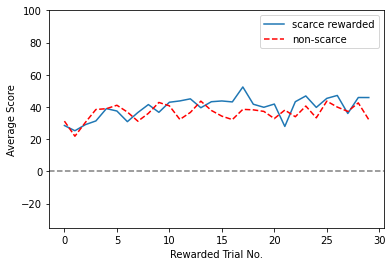

In [32]:
scarce = np.array(scarce_rewarded_scores)
non_scarce = np.array(non_scarce_rewarded_scores)
scarce_first_30 = np.array([scores[0:30] for scores in scarce_scores_all])

#plt.errorbar(range(scarce.shape[1]), scarce.mean(axis=0), yerr=scarce.std(axis=0), label='scarce rewarded')
#plt.errorbar(range(scarce_first_30.shape[1]), scarce_first_30.mean(axis=0), yerr=scarce_first_30.std(axis=0), label='scarce first 30')
#plt.errorbar(range(non_scarce.shape[1]), non_scarce.mean(axis=0), yerr=non_scarce.std(axis=0), color='r', linestyle='--', label='non-scarce')
plt.plot(range(scarce.shape[1]), scarce.mean(axis=0), label='scarce rewarded')
#plt.plot(range(scarce_first_30.shape[1]), scarce_first_30.mean(axis=0), label='scarce first 30')
plt.plot(range(non_scarce.shape[1]), non_scarce.mean(axis=0), color='r', linestyle='--', label='non-scarce')


plt.legend()
plt.axhline(0, linestyle = '--', color='k', alpha = 0.5)
plt.ylim([-35,100])
plt.xlabel("Rewarded Trial No.")
plt.ylabel("Average Score")
plt.show()

In [23]:
# CSV

import csv
import sys
import json

csv.field_size_limit(sys.maxsize)

part_dicts = []

with open('../results/pilot_2.0_results.csv', newline='') as f:
    csv_file = csv.reader(f)
    for idx, row in enumerate(csv_file):
        if idx != 0:
            part_dicts.append(json.loads(row[-1]))

for part in part_dicts:
    if part['workerId'].startswith("5eb40f1f0d916d20d9db9144"):
        print(len(part['data']))
        print(part['data'][-1])

666
{'uniqueid': '5eb40f1f0d916d20d9db9144:62ffb73fe31bae241538cb8a', 'current_trial': 665, 'dateTime': 1660931339681, 'trialdata': {'rt': 748, 'stimulus': "<p id='stroop-text' class='stroop-yellow'>YELLOW</p>", 'response': 'y', 'stimulus-type': 'congruent', 'word': 'yellow', 'color': 'yellow', 'correct_response': 'y', 'trial_id': 'stroop-congruent-19', 'trial_type': 'html-keyboard-response', 'trial_index': 665, 'time_elapsed': 2394224, 'internal_node_id': '0.0-16.0-8.0-68.0'}}
